# Cross entropy and L2 distance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib notebook

In [68]:
def sig(x):
    return 1/(1+np.exp(-x))

def f(x):
    global w,b
    return sig(w.T@x+b)

def l2(xs,ys):
    global w,b

    s = 0
    for x,y in zip(xs,ys):
        s +=(f(x)-y)**2
        
    return s/len(ys)
    
def cross_ent(xs,ys):
    global w,b

    s = 0
    for x,y in zip(xs,ys):
        s += -y*np.log(f(x))-(1-y)*np.log(1-f(x))
        
    return s/len(ys)
    
def generate_data():
    global w,b
    w,b = np.random.random(dim), 0#np.random.random()
    print("w*=",w)
    xs = np.random.uniform(-10,10,(n,dim))
    ys=[]
    for x in xs:
        ys.append(np.round(f(x)))
    print('minL = ',l2(xs,ys))
    return xs,np.array(ys)

w,b=0,0
dim = 2
n=100000
xs, ys = generate_data()
# w,b = np.random.random(dim), 0#np.random.random()

# l2(xs,ys), cross_ent(xs,ys)

w*= [0.5116566  0.05818754]
minL =  0.037643308769787956


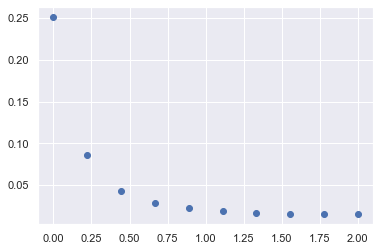

In [70]:
count = 10
w1s = np.linspace(0,2,count)
w2s = [0.058]#np.linspace(0,1,count)
xx = []
yy = []
for w1 in w1s:
    for w2 in w2s:
        w=np.array([w1,w2])
        xx.append(w[0])
        yy.append(l2(xs,ys))
        
plt.plot(xx,yy,'ob')
plt.show()

<IPython.core.display.Javascript object>


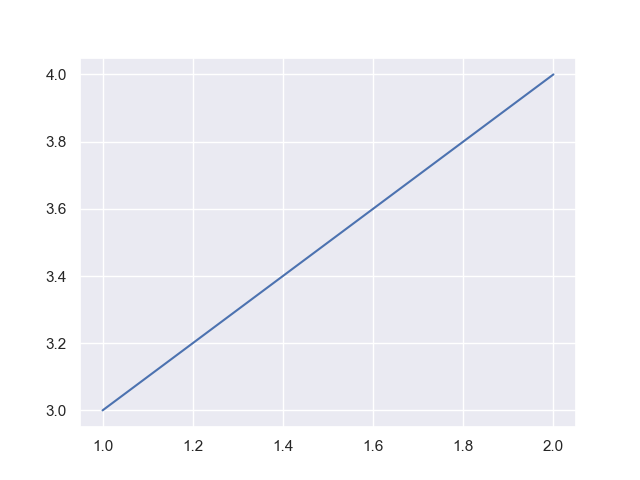

In [4]:
plt.plot([1,2],[3,4])
plt.show()

<IPython.core.display.Javascript object>


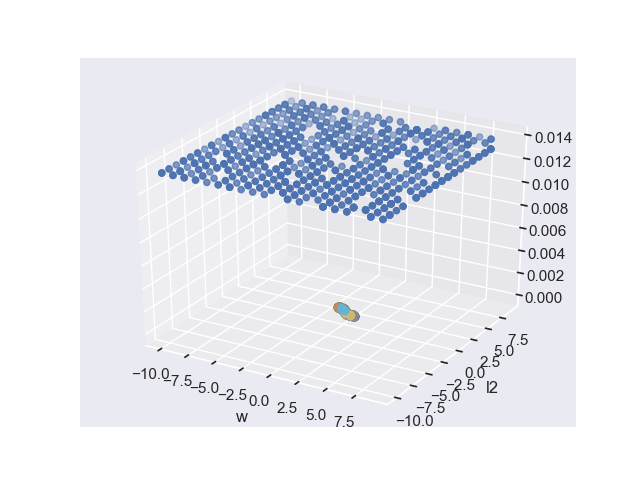

In [164]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ws = np.random.randint(-1,1,100)
bs = np.random.randint(-1,1,100)
z = l2(xs,ys)
ax.scatter3D(x,y,z)

In [88]:
%matplotlib inline
w1 = 1
w2 = 2.3
xs = np.random.uniform(-10,10,(100,2))
ys = []
for x in xs:
    ys.append(1 if w1*x[0]+w2*x[1]>0 else 0)

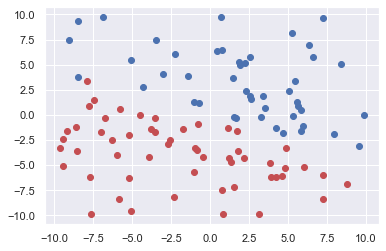

In [89]:
for x in xs:
    plt.plot(x[0],x[1],'bo' if sig(w1*x[0]+w2*x[1])>0.5 else 'ro')

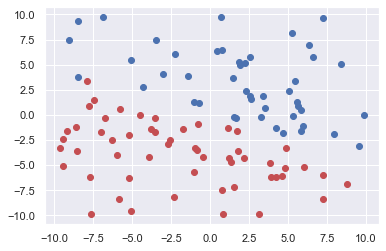

In [90]:
for x,y in zip(xs,ys):
    plt.plot(x[0],x[1],'bo' if y==1 else 'ro')    

In [91]:
def l2():
    s=0
    for x,y in zip(xs,ys):
        s+=(sig(w1*x[0]+w2*x[1]) - y)**2
    return s
l2()

1.642262098223979

<IPython.core.display.Javascript object>


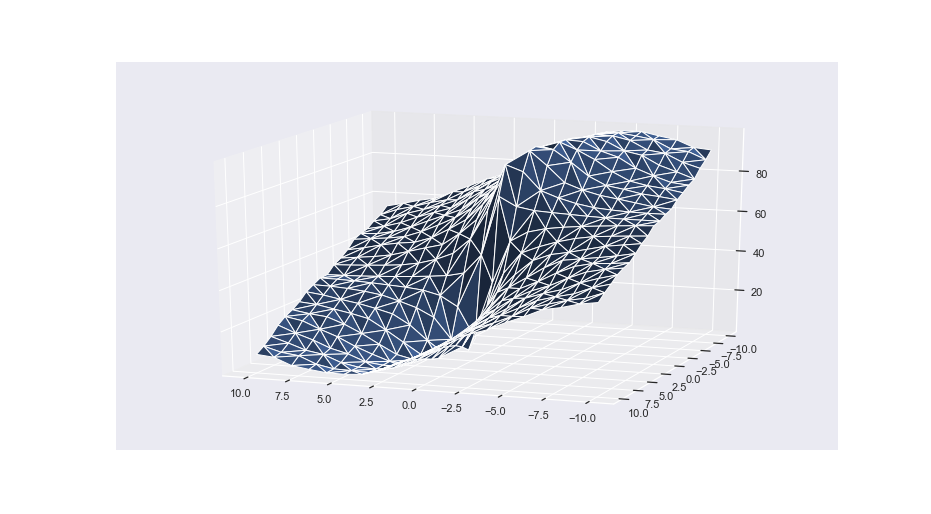

In [111]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
n=20
r=10
w1s = np.linspace(-r,r,n)
w2s = np.linspace(-r,r,n)
x_coord,y_coord,z_coord =[],[],[]
for i in w1s:
    for j in w2s:
        w1, w2 = i,j
        x_coord.append(i)
        y_coord.append(j)
        z_coord.append(l2())
        
ax.plot_trisurf(x_coord,y_coord,z_coord)

In [131]:
def ce():
    s=0
    for x,y in zip(xs,ys):
        f = sig(w1*x[0]+w2*x[1])
        if y==0:
            s += -(1-y)*np.log(1-f)
        else:
            s += -y*np.log(f)

    return s
ce()

136.22252300316325

<IPython.core.display.Javascript object>


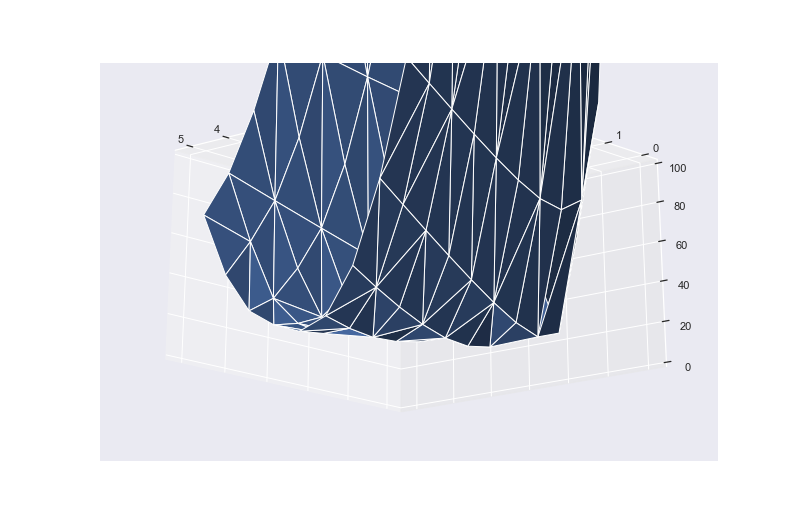

C:\Users\Varuzhan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


(0, 100)

In [146]:
ax = plt.axes(projection='3d')
n=10
w1s = np.linspace(-1,5,n)
w2s = np.linspace(0,5,n)
x_coord,y_coord,z_coord =[],[],[]
for i in w1s:
    for j in w2s:
        w1, w2 = i,j
        if ce()<1000:
            x_coord.append(i)
            y_coord.append(j)
            z_coord.append(ce())
        
ax.plot_trisurf(x_coord,y_coord,z_coord)
ax.set_xlabel("W1")
ax.set_zlim((0,100))